In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('property.csv')

print(df.head())

  property_type          prices  \
0        Chalet   1,590,000 EGP   
1     Apartment   3,700,000 EGP   
2     Apartment  11,500,000 EGP   
3     Apartment   9,700,000 EGP   
4        Chalet  10,600,000 EGP   

                                    prop_description  \
0  Chalet Pool View 2 Bedrooms with Discount on Cash   
1      Own an Apartment for Sale Mushtal Street Tora   
2            Apartment for Sale – Immediate Delivery   
3   شقه مميزه جدا للبيع كاش فى مدينتى B11 مساحة 200م   
4  Chalet 2Bedrooms Lowest Price Fully Finished D...   

                                           locations beds_num baths_num  \
0         Golf Porto Marina, Al Alamein, North Coast        2         2   
1              Cornish Al Nile St., Hay Torah, Cairo        3         3   
2  Mountain View Hyde Park, 5th Settlement Compou...        3         2   
3                           Privado, Madinaty, Cairo        3         3   
4      Silver Sands, Qesm Marsa Matrouh, North Coast        2         2   

 

In [8]:
df['prices'] = df['prices'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

df['area'] = df['area'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

df.dropna(subset=['prices', 'area'], inplace=True)

df = df[(df['prices'] > 100000) & (df['area'] > 20)]

print("Data Cleaned!")
print(df.head())

Data Cleaned!
  property_type      prices  \
0        Chalet   1590000.0   
1     Apartment   3700000.0   
2     Apartment  11500000.0   
3     Apartment   9700000.0   
4        Chalet  10600000.0   

                                    prop_description  \
0  Chalet Pool View 2 Bedrooms with Discount on Cash   
1      Own an Apartment for Sale Mushtal Street Tora   
2            Apartment for Sale – Immediate Delivery   
3   شقه مميزه جدا للبيع كاش فى مدينتى B11 مساحة 200م   
4  Chalet 2Bedrooms Lowest Price Fully Finished D...   

                                           locations beds_num baths_num   area  
0         Golf Porto Marina, Al Alamein, North Coast        2         2   60.0  
1              Cornish Al Nile St., Hay Torah, Cairo        3         3  180.0  
2  Mountain View Hyde Park, 5th Settlement Compou...        3         2  202.0  
3                           Privado, Madinaty, Cairo        3         3  200.0  
4      Silver Sands, Qesm Marsa Matrouh, North Coast     

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2406274817.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['prices'] = df['prices'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)
/tmp/ipython-input-2406274817.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['area'] = df['area'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)


In [9]:
df['Price_per_m2'] = df['prices'] / df['area']

df['Location_Main'] = df['locations'].apply(lambda x: x.split(',')[0].strip())

print(df[['Location_Main', 'Price_per_m2']].head())

             Location_Main  Price_per_m2
0        Golf Porto Marina  26500.000000
1      Cornish Al Nile St.  20555.555556
2  Mountain View Hyde Park  56930.693069
3                  Privado  48500.000000
4             Silver Sands  88333.333333


In [10]:
area_stats = df.groupby('Location_Main')['Price_per_m2'].agg(['mean', 'std']).reset_index()

df = df.merge(area_stats, on='Location_Main')

df['Is_Deal'] = df['Price_per_m2'] < (df['mean'] * 0.8)

top_deals = df[df['Is_Deal'] == True].sort_values(by='Price_per_m2').head(10)
print("Top 10 Deals Found!")

Top 10 Deals Found!


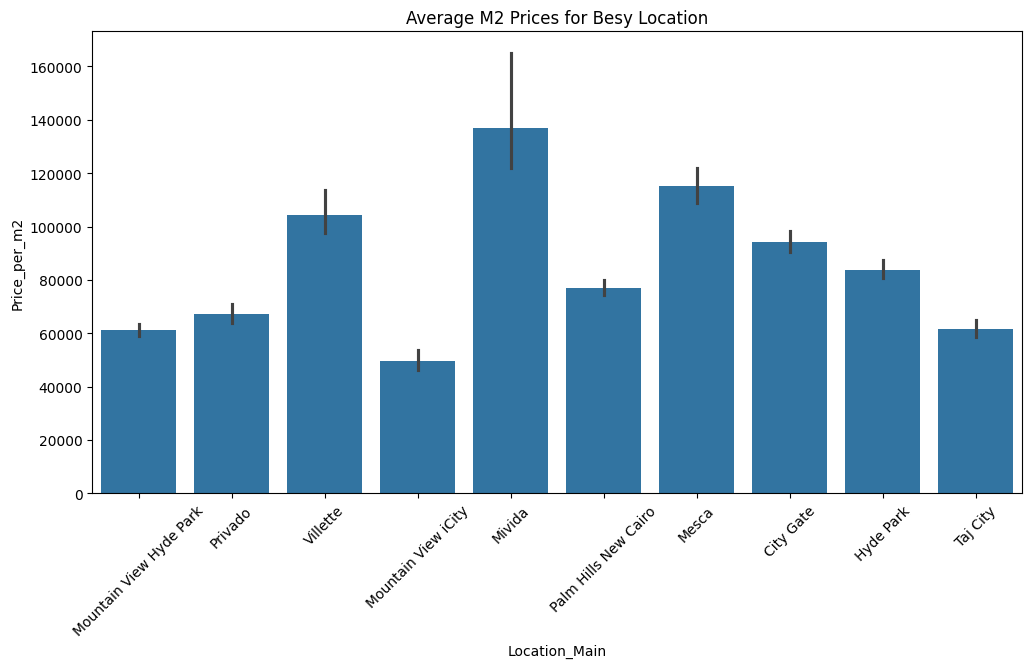

In [12]:
plt.figure(figsize=(12,6))
top_locations = df['Location_Main'].value_counts().head(10).index
sns.barplot(data=df[df['Location_Main'].isin(top_locations)], x='Location_Main', y='Price_per_m2')
plt.title('Average M2 Prices for Besy Location')
plt.xticks(rotation=45)
plt.show()

In [13]:
df.to_csv('cleaned_real_estate_data.csv', index=False)